## Digits classification using MNIST Dataset

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Reading the data

In [2]:
data = pd.read_csv("E:\Github\Datasets\mnist\mnist_train.csv")

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(60000, 785)

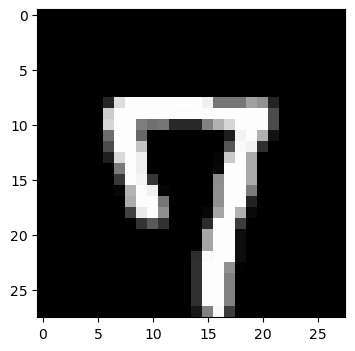

In [19]:
# pick a sample to plot
sample = 3426
image = data.iloc[sample, 1:].values.reshape(28,28)

# plot the sample
fig = plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray')
plt.show()

#### Splitting the dataset

In [21]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train.shape, y_train.shape

((48000, 784), (48000,))

In [25]:
X_test.shape, y_test.shape

((12000, 784), (12000,))

#### Feature Scaling

In [27]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X_test[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Building the Perceptron Model and prediction

In [31]:
model = Perceptron()

In [32]:
model.fit(X_train, y_train)

Perceptron()

In [33]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#### Model Evaluation

In [35]:
print("************************** Classification Report - Training Data **************************\n\n")
print(classification_report(y_train, y_pred_train))

************************** Classification Report - Training Data **************************


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4718
           1       0.93      0.97      0.95      5363
           2       0.91      0.87      0.89      4792
           3       0.83      0.88      0.86      4923
           4       0.92      0.89      0.90      4689
           5       0.82      0.78      0.80      4346
           6       0.94      0.95      0.94      4728
           7       0.94      0.89      0.91      5037
           8       0.84      0.79      0.81      4660
           9       0.82      0.88      0.85      4744

    accuracy                           0.89     48000
   macro avg       0.89      0.89      0.89     48000
weighted avg       0.89      0.89      0.89     48000



************************** Confusion Matrix Report - Training Data **************************




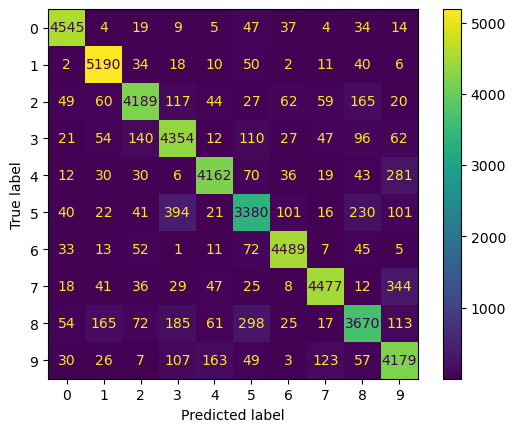

In [36]:
print("************************** Confusion Matrix Report - Training Data **************************\n\n")
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [37]:
print("************************** Classification Report - Training Data **************************\n\n")
print(classification_report(y_test, y_pred_test))

************************** Classification Report - Training Data **************************


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1205
           1       0.92      0.97      0.95      1379
           2       0.90      0.86      0.88      1166
           3       0.84      0.86      0.85      1208
           4       0.91      0.87      0.89      1153
           5       0.79      0.75      0.77      1075
           6       0.93      0.94      0.93      1190
           7       0.92      0.88      0.90      1228
           8       0.82      0.78      0.80      1191
           9       0.79      0.87      0.83      1205

    accuracy                           0.88     12000
   macro avg       0.88      0.87      0.87     12000
weighted avg       0.88      0.88      0.88     12000



************************** Confusion Matrix Report - Training Data **************************




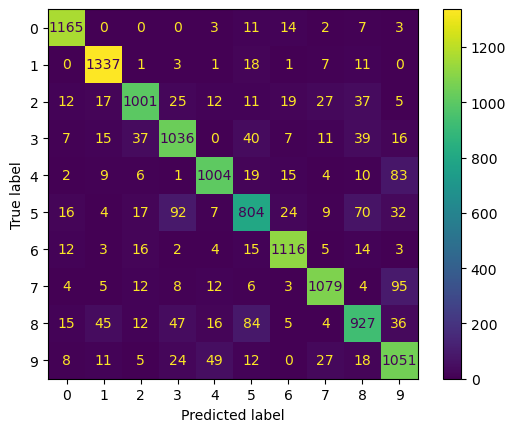

In [38]:
print("************************** Confusion Matrix Report - Training Data **************************\n\n")
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()